<a href="https://colab.research.google.com/github/dipteshgour-web/Seismic-Data-Generator/blob/main/Siesmic_wave_%20generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 Initializing Quantum-Seismic Data Generator (Fixed)...
🛠️ Generating 2000 traces using Manual Ricker Wavelet...
⚖️ Normalizing Data (0-1 Scaling)...
💾 Saving .npy files...
✅ SUCCESS! Dataset generated without SciPy errors.
   Features Shape: (2000, 1000)
   Labels Shape: (2000,)


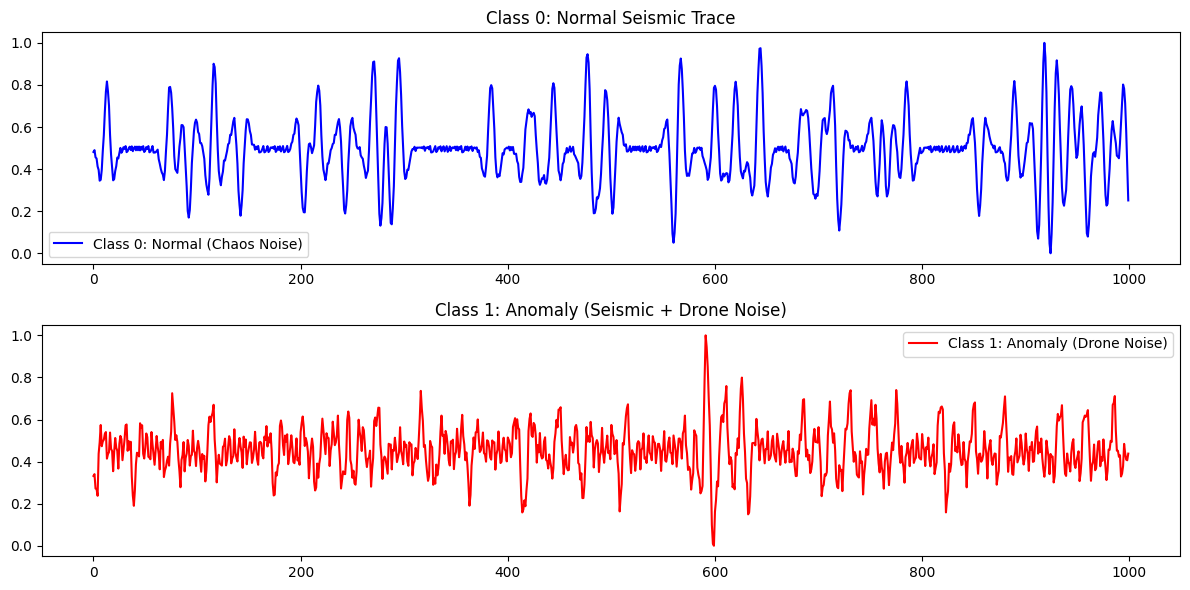

In [10]:
!pip install numpy scipy matplotlib scikit-learn
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


NUM_SAMPLES = 2000
TRACE_LENGTH = 1000
SAMPLE_RATE = 0.002
CENTER_FREQ = 30

print("🚀 Initializing Quantum-Seismic Data Generator (Fixed)...")


def get_ricker_wavelet(freq=30, length=0.1, dt=0.002):
    t = np.arange(-length/2, length/2, dt)

    y = (1.0 - 2.0*(np.pi**2)*(freq**2)*(t**2)) * np.exp(-(np.pi**2)*(freq**2)*(t**2))
    return y


def get_reflectivity(length, sparsity=0.05):

    ref = np.zeros(length)
    num_spikes = int(length * sparsity)


    spike_locs = np.random.choice(length, num_spikes, replace=False)


    spike_amps = np.random.choice([-1, 1], num_spikes)

    ref[spike_locs] = spike_amps
    return ref


def get_chaotic_noise(length):
    noise = np.zeros(length)
    x = 0.1
    r = 3.99

    for i in range(length):
        x = r * x * (1 - x)
        noise[i] = x


    return (noise - 0.5) * 0.1


def get_drone_noise(length):
    t = np.linspace(0, 1, length)

    f1 = 200
    f2 = 450
    motor_hum = 0.3 * np.sin(2 * np.pi * f1 * t) + 0.15 * np.sin(2 * np.pi * f2 * t)


    jitter = np.random.normal(0, 0.05, length)
    return motor_hum + jitter



features = []
labels = []


wavelet = get_ricker_wavelet(freq=CENTER_FREQ)

print(f"🛠️ Generating {NUM_SAMPLES} traces using Manual Ricker Wavelet...")

for i in range(NUM_SAMPLES):

    reflectivity = get_reflectivity(TRACE_LENGTH)


    clean_trace = np.convolve(reflectivity, wavelet, mode='same')


    chaos = get_chaotic_noise(TRACE_LENGTH)
    base_trace = clean_trace + chaos


    if i < NUM_SAMPLES // 2:
        final_trace = base_trace
        label = 0
    else:
        drone_interference = get_drone_noise(TRACE_LENGTH)
        final_trace = base_trace + drone_interference
        label = 1

    features.append(final_trace)
    labels.append(label)


features = np.array(features)
labels = np.array(labels)


print("⚖️ Normalizing Data (0-1 Scaling)...")
for idx, tr in enumerate(features):
    min_val = np.min(tr)
    max_val = np.max(tr)

    if max_val - min_val == 0:
        features[idx] = tr
    else:
        features[idx] = (tr - min_val) / (max_val - min_val)

print("💾 Saving .npy files...")
np.save("features.npy", features)
np.save("labels.npy", labels)

print("✅ SUCCESS! Dataset generated without SciPy errors.")
print(f"   Features Shape: {features.shape}")
print(f"   Labels Shape: {labels.shape}")


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(features[0], color='blue', label='Class 0: Normal (Chaos Noise)')
plt.title("Class 0: Normal Seismic Trace")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(features[-1], color='red', label='Class 1: Anomaly (Drone Noise)')
plt.title("Class 1: Anomaly (Seismic + Drone Noise)")
plt.legend()

plt.tight_layout()
plt.show()